[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arsalmairaj2k/fashion-mnist-regularization-study/blob/main/Fashion_MNIST_Regularlization_Study.ipynb)

**Group Members:**

Arsal Mairaj (21I-1520), Ali Haider (21I-1522), Shayan (22I-2392)

**Submission Date:**

30/04/2025

**Course:**

 Machine Learning for Robotics

**Instructor:**

Dr. Basharat Hussain

**Section:**

CS-Z

# **Introduction**
This project explores various machine learning techniques applied to the Fashion MNIST dataset, a widely used benchmark for image classification. The primary objective is to preprocess the dataset and train, evaluate, and compare the performance of different classification models.

**The project involves:**

- Loading and preprocessing the Fashion MNIST data, including normalization, splitting into training, validation, and test sets, and reshaping for different model requirements.

- Applying dimensionality reduction techniques such as Principal Component Analysis (PCA) and visualizing the data using t-SNE and UMAP.

- Training and evaluating a range of models, including Logistic Regression, Support Vector Machines (SVM) with an RBF kernel, Random Forests, Gradient Boosting, and Neural Networks (including a Convolutional Neural Network).

- Investigating the impact of different hyperparameters and regularization methods (L2, Dropout, Early Stopping) on model performance and overfitting.
Comparing the models based on key metrics such as test accuracy, overfitting gap, and training time.

- Through this comparative study, the project aims to identify effective approaches for classifying Fashion MNIST images and understand the trade-offs between different algorithms and techniques.

## **1. Importing all libraires needed**

This code snippet imports essential libraries for machine learning and data visualization. tensorflow is used for building and training neural networks, numpy handles numerical computations, and sklearn provides tools like train_test_split for splitting datasets and PCA for dimensionality reduction. matplotlib and seaborn are for plotting, while TSNE and umap are imported for advanced visualization techniques to reduce high-dimensional data into 2D or 3D for visual analysis.

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import seaborn as sns

## **2. Code to Load Fashion MNIST**

This code snippet loads the Fashion MNIST dataset using TensorFlow's Keras API, which contains 28x28 grayscale images of fashion items. The dataset is split into training (x_train, y_train) and testing (x_test, y_test) sets, where x_train and x_test are the images, and y_train and y_test are their corresponding labels. The print statements display the shapes of these arrays to verify the data structure, typically showing 60,000 training images and 10,000 test images, each 28x28, with corresponding label arrays.

In [ ]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Verify the shapes of the loaded data
print(f"Training data shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels: {y_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28), Labels: (60000,)
Test data shape: (10000, 28, 28), Labels: (10000,)


## **3. Code for Normalizing Pixel Values**

This code loads the Fashion MNIST dataset, which consists of images and their corresponding labels. It then normalizes the pixel values of these images from the original range of 0-255 to a floating-point range of 0-1, a common preprocessing step for image data in machine learning.

In [ ]:
# Step 1: Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Step 2: Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Verify normalization by checking min and max values
print(f"Training data min: {x_train.min()}, max: {x_train.max()}")
print(f"Test data min: {x_test.min()}, max: {x_test.max()}")

Training data min: 0.0, max: 1.0
Test data min: 0.0, max: 1.0


## **4. Code for Splitting the Data**

This code loads the Fashion MNIST dataset and normalizes the pixel values. Unlike a standard split, it then custom splits the initial training data (60,000 images) into three sets: a training set (70%), a validation set (15%), and a test set (15%), replacing the original test set provided by the dataset loader.

In [ ]:
# Step 1: Load the Fashion MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Step 2: Normalize pixel values to [0, 1]
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 3: Split data into 70% train, 15% validation, 15% test
# First, split full training data (60,000 images) into train (70%) and temp (30%)
x_train, x_temp, y_train, y_temp = train_test_split(
    x_train_full, y_train_full, test_size=0.3, random_state=42
)

# Then, split temp (30%) into validation (15%) and test (15%)
# Since temp is 30% of original, splitting it 50-50 gives 15% each
x_val, x_test_new, y_val, y_test_new = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42
)

# Use x_test_new as the test set (instead of the original x_test)
x_test = x_test_new
y_test = y_test_new

# Verify shapes
print(f"Training set shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Validation set shape: {x_val.shape}, Labels: {y_val.shape}")
print(f"Test set shape: {x_test.shape}, Labels: {y_test.shape}")

Training set shape: (42000, 28, 28), Labels: (42000,)
Validation set shape: (9000, 28, 28), Labels: (9000,)
Test set shape: (9000, 28, 28), Labels: (9000,)


## **5. Code for Flattening Images**

This code loads and normalizes the Fashion MNIST dataset, then splits it into training, validation, and test sets. Additionally, it flattens each 28x28 image into a 1D vector of 784 pixel values, preparing the data for models that require a flat input format.

In [ ]:
# Step 1: Load the Fashion MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Step 2: Normalize pixel values to [0, 1]
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 3: Split data into 70% train, 15% validation, 15% test
x_train, x_temp, y_train, y_temp = train_test_split(
    x_train_full, y_train_full, test_size=0.3, random_state=42
)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42
)

# Step 4: Flatten images to 1D vectors (784 features) for non-NN models
x_train_flat = x_train.reshape(x_train.shape[0], -1)  # (num_samples, 784)
x_val_flat = x_val.reshape(x_val.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Verify flattened shapes
print(f"Flattened training set shape: {x_train_flat.shape}")
print(f"Flattened validation set shape: {x_val_flat.shape}")
print(f"Flattened test set shape: {x_test_flat.shape}")

# Optional: Verify a sample to ensure flattening worked
print(f"First training sample shape before flattening: {x_train[0].shape}")
print(f"First training sample shape after flattening: {x_train_flat[0].shape}")

Flattened training set shape: (42000, 784)
Flattened validation set shape: (9000, 784)
Flattened test set shape: (9000, 784)
First training sample shape before flattening: (28, 28)
First training sample shape after flattening: (784,)


## **6. Dimensionality Reduction with PCA**

This code performs Principal Component Analysis (PCA) on the flattened training data to reduce its dimensionality. It calculates the number of components needed to retain 95% and 98% of the variance, visualizes this with an elbow plot, and then transforms the training, validation, and test sets using these calculated numbers of components, effectively compressing the data while retaining most of its information.

Number of components for 95% variance: 187
Number of components for 98% variance: 348


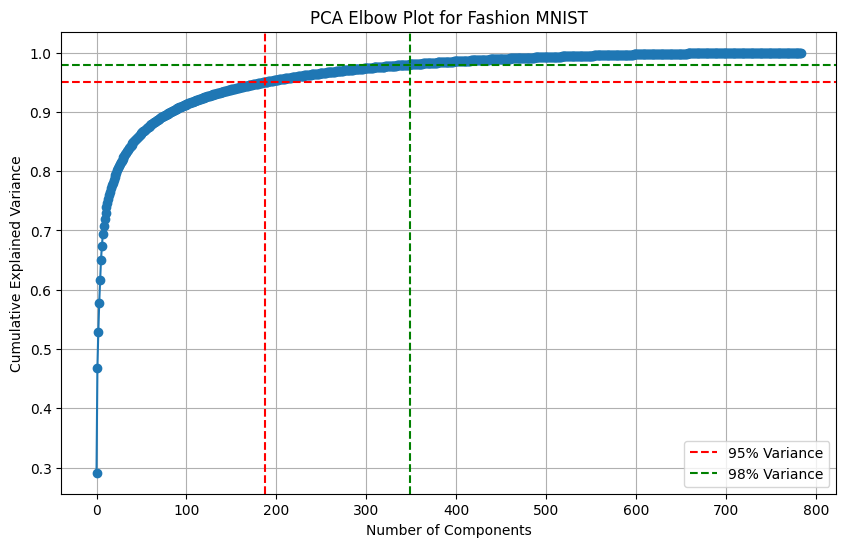

PCA 95% shapes - Train: (42000, 187), Val: (9000, 187), Test: (9000, 187)
PCA 98% shapes - Train: (42000, 348), Val: (9000, 348), Test: (9000, 348)


In [ ]:
# PCA on flattened training data
pca = PCA()
pca.fit(x_train_flat)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components for 95% and 98% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_98 = np.argmax(cumulative_variance >= 0.98) + 1
print(f"Number of components for 95% variance: {n_components_95}")
print(f"Number of components for 98% variance: {n_components_98}")

# Elbow plot for cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.axhline(y=0.98, color='g', linestyle='--', label='98% Variance')
plt.axvline(x=n_components_95, color='r', linestyle='--')
plt.axvline(x=n_components_98, color='g', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Elbow Plot for Fashion MNIST')
plt.legend()
plt.grid(True)
plt.show()

# Apply PCA with 95% variance
pca_95 = PCA(n_components=n_components_95)
x_train_pca_95 = pca_95.fit_transform(x_train_flat)
x_val_pca_95 = pca_95.transform(x_val_flat)
x_test_pca_95 = pca_95.transform(x_test_flat)
print(f"PCA 95% shapes - Train: {x_train_pca_95.shape}, Val: {x_val_pca_95.shape}, Test: {x_test_pca_95.shape}")

# Apply PCA with 98% variance
pca_98 = PCA(n_components=n_components_98)
x_train_pca_98 = pca_98.fit_transform(x_train_flat)
x_val_pca_98 = pca_98.transform(x_val_flat)
x_test_pca_98 = pca_98.transform(x_test_flat)
print(f"PCA 98% shapes - Train: {x_train_pca_98.shape}, Val: {x_val_pca_98.shape}, Test: {x_test_pca_98.shape}")

# Optional: Save PCA-transformed data
np.save('x_train_pca_95.npy', x_train_pca_95)
np.save('x_val_pca_95.npy', x_val_pca_95)
np.save('x_test_pca_95.npy', x_test_pca_95)
np.save('x_train_pca_98.npy', x_train_pca_98)
np.save('x_val_pca_98.npy', x_val_pca_98)
np.save('x_test_pca_98.npy', x_test_pca_98)

## **7. t-SNE and UMAP Visualizations**

This code takes a subset of the PCA-reduced data and applies two non-linear dimensionality reduction techniques, t-SNE and UMAP, to project the data into two dimensions. It then generates scatter plots for both results, coloring points by their class labels to visualize how well different fashion items are separated in these lower-dimensional representations.

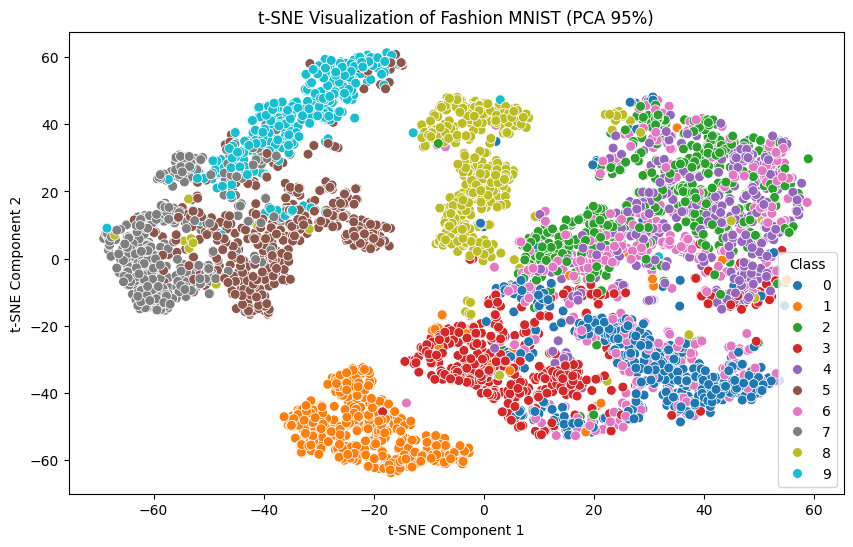

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


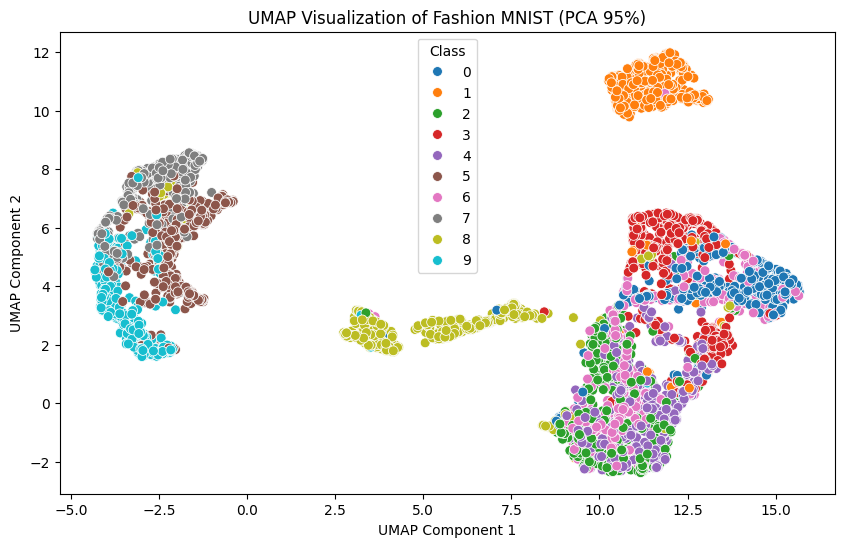

In [ ]:
# Subset data for visualization (to reduce computation time)
subset_size = 5000
np.random.seed(42)
subset_indices = np.random.choice(x_train_pca_95.shape[0], subset_size, replace=False)
x_subset_pca_95 = x_train_pca_95[subset_indices]
y_subset = y_train[subset_indices]

# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_subset_pca_95)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_tsne[:, 0], y=x_tsne[:, 1], hue=y_subset, palette='tab10', s=50)
plt.title('t-SNE Visualization of Fashion MNIST (PCA 95%)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Class')
plt.show()

# UMAP visualization (50 components)
umap_model = umap.UMAP(n_components=50, random_state=42)
x_umap = umap_model.fit_transform(x_subset_pca_95)
# Reduce to 2D for visualization
umap_2d = umap.UMAP(n_components=2, random_state=42)
x_umap_2d = umap_2d.fit_transform(x_subset_pca_95)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_umap_2d[:, 0], y=x_umap_2d[:, 1], hue=y_subset, palette='tab10', s=50)
plt.title('UMAP Visualization of Fashion MNIST (PCA 95%)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Class')
plt.show()

## **8. Models Evaluation**

his code defines a function evaluate_model that trains a given model on training data, evaluates its performance (accuracy and overfitting gap) on training, validation, and test sets, measures training time, and stores these metrics. For neural network models, it also plots and saves the training and validation loss curves. An empty list results is initialized to collect the evaluation outputs from multiple models.

In [ ]:
# Function to evaluate models
def evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test, model_name, reg_method):
    start_time = time.time()
    if "NN" in model_name:
        # For Keras models, use fit and predict
        history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                           epochs=50, batch_size=128, verbose=0)
        train_acc = model.evaluate(x_train, y_train, verbose=0)[1]
        val_acc = model.evaluate(x_val, y_val, verbose=0)[1]
        test_acc = model.evaluate(x_test, y_test, verbose=0)[1]
        training_time = time.time() - start_time
        # Plot loss curves
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} - {reg_method} Loss Curves')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'{model_name}_{reg_method}_loss.png', dpi=300, bbox_inches='tight')
        plt.show()
    else:
        # For scikit-learn models
        model.fit(x_train, y_train)
        train_acc = accuracy_score(y_train, model.predict(x_train))
        val_acc = accuracy_score(y_val, model.predict(x_val))
        test_acc = accuracy_score(y_test, model.predict(x_test))
        training_time = time.time() - start_time

    overfitting_gap = train_acc - val_acc
    return {
        'Model': model_name,
        'Regularization': reg_method,
        'Test Accuracy': test_acc,
        'Overfitting Gap': overfitting_gap,
        'Training Time (s)': training_time
    }

# Store results for comparison
results = []

## **9. Baseline NN, PCA-NN, Logistic Regression**

This code trains and evaluates several different machine learning models on the Fashion MNIST dataset. It includes simple neural networks with L2 regularization and Dropout, a neural network trained on PCA-reduced data with L2 and Early Stopping, and Logistic Regression models with L1, L2, and ElasticNet regularization trained on PCA-reduced data. It uses the previously defined evaluate_model function to train and assess each model's performance and training time, finally presenting the results in a comparison table.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


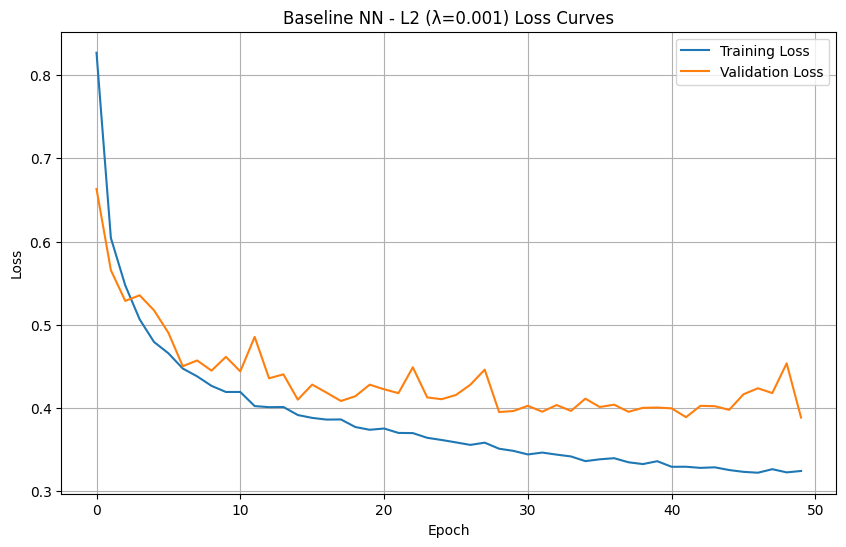

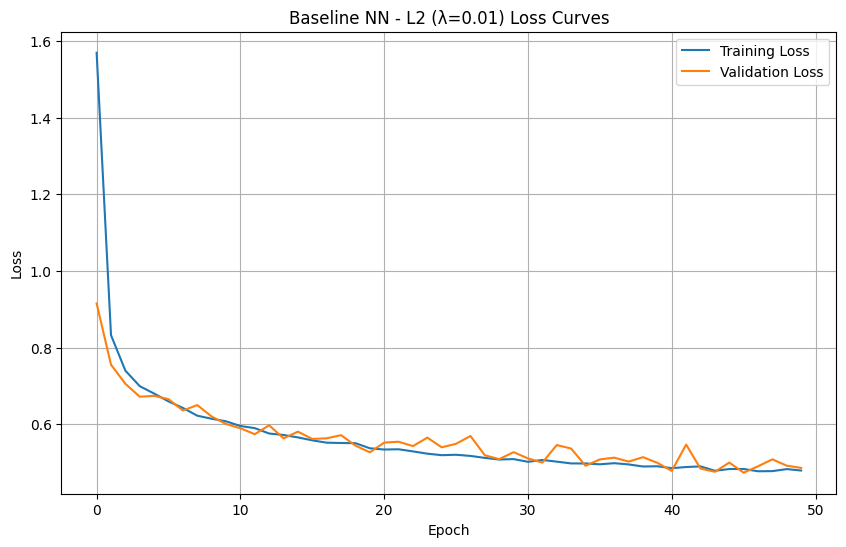

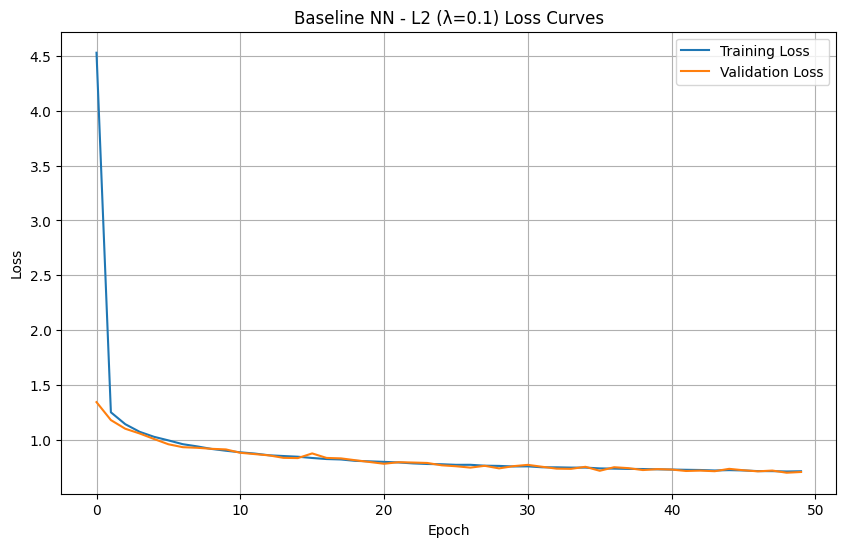

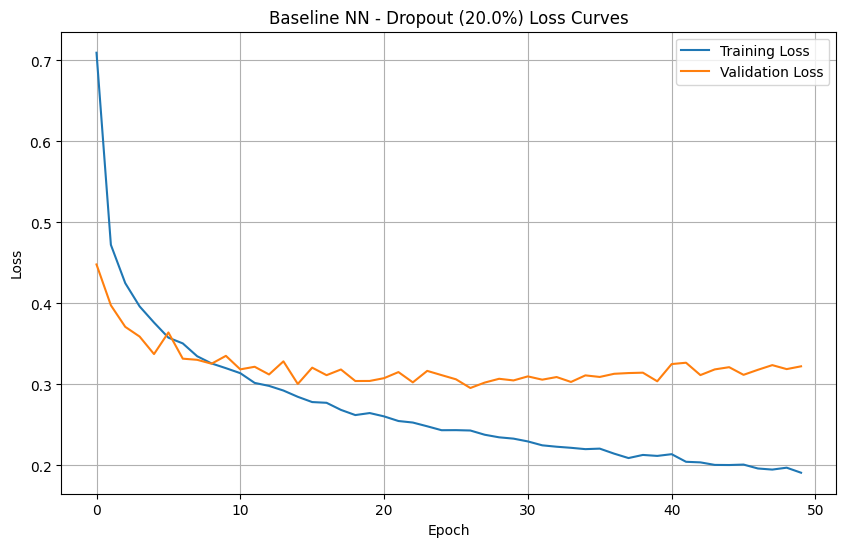

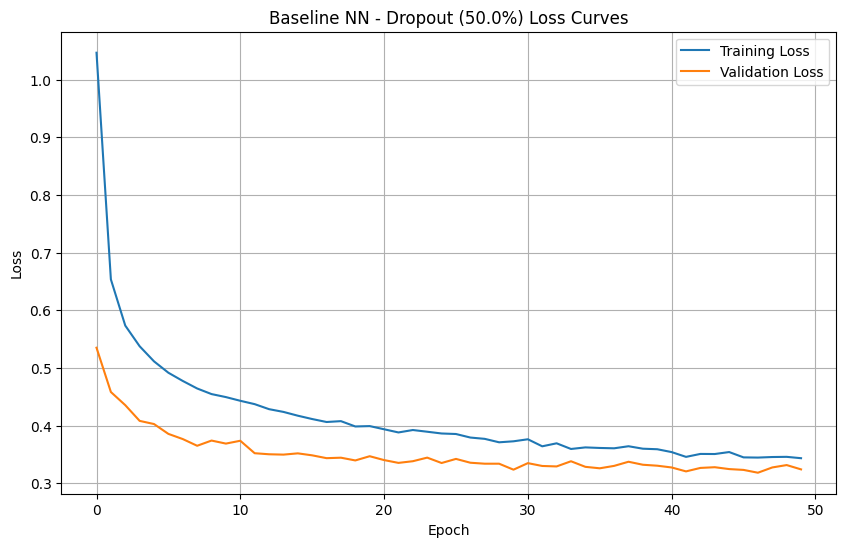

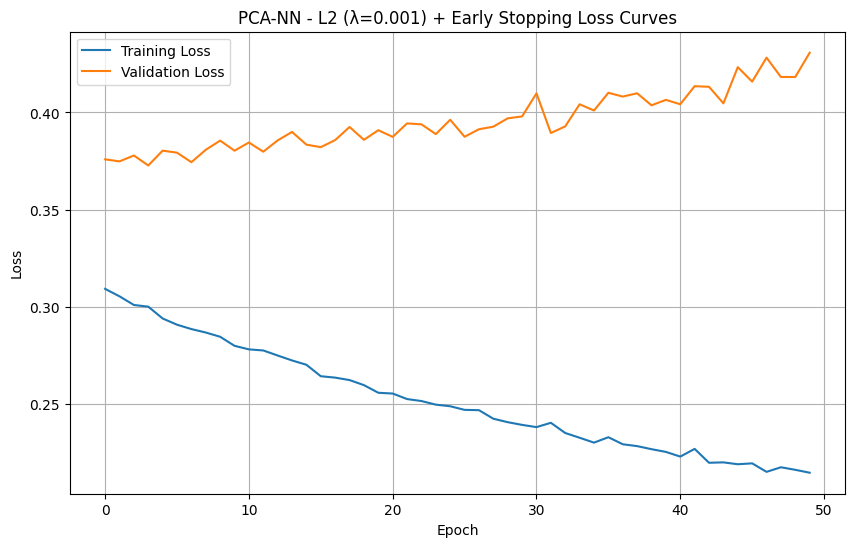


Model Comparison Table:
                 Model                 Regularization  Test Accuracy  \
0          Baseline NN                   L2 (λ=0.001)       0.888111   
1          Baseline NN                    L2 (λ=0.01)       0.861333   
2          Baseline NN                     L2 (λ=0.1)       0.804444   
3          Baseline NN                Dropout (20.0%)       0.896333   
4          Baseline NN                Dropout (50.0%)       0.886778   
5               PCA-NN  L2 (λ=0.001) + Early Stopping       0.888333   
6  Logistic Regression                     L1 (α=0.1)       0.854556   
7  Logistic Regression                     L2 (α=0.1)       0.854778   
8  Logistic Regression             ElasticNet (α=0.1)       0.854667   

   Overfitting Gap  Training Time (s)  
0         0.034206         118.414382  
1         0.005436         135.065700  
2        -0.003817         122.923015  
3         0.052079         125.532976  
4         0.029603         137.420456  
5         0.07

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# 1. Baseline NN
l2_lambdas = [0.001, 0.01, 0.1]
dropout_rates = [0.2, 0.5]

for l2_lambda in l2_lambdas:
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda), input_shape=(784,)),
        Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    result = evaluate_model(model, x_train_flat, y_train, x_val_flat, y_val, x_test_flat, y_test,
                            'Baseline NN', f'L2 (λ={l2_lambda})')
    results.append(result)

for dropout_rate in dropout_rates:
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    result = evaluate_model(model, x_train_flat, y_train, x_val_flat, y_val, x_test_flat, y_test,
                            'Baseline NN', f'Dropout ({dropout_rate*100}%)')
    results.append(result)

# 2. PCA-NN
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(x_train_pca_95.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_train_pca_95, y_train, validation_data=(x_val_pca_95, y_val),
                    epochs=50, batch_size=128, callbacks=[early_stopping], verbose=0)
result = evaluate_model(model, x_train_pca_95, y_train, x_val_pca_95, y_val, x_test_pca_95, y_test,
                        'PCA-NN', 'L2 (λ=0.001) + Early Stopping')
results.append(result)

# 3. Logistic Regression
# L1 (Lasso)
lr_l1 = LogisticRegression(penalty='l1', C=1/0.1, solver='saga', max_iter=1000)
result = evaluate_model(lr_l1, x_train_pca_95, y_train, x_val_pca_95, y_val, x_test_pca_95, y_test,
                        'Logistic Regression', 'L1 (α=0.1)')
results.append(result)

# L2 (Ridge)
lr_l2 = LogisticRegression(penalty='l2', C=1/0.1, solver='saga', max_iter=1000)
result = evaluate_model(lr_l2, x_train_pca_95, y_train, x_val_pca_95, y_val, x_test_pca_95, y_test,
                        'Logistic Regression', 'L2 (α=0.1)')
results.append(result)

# ElasticNet
lr_en = LogisticRegression(penalty='elasticnet', C=1/0.1, l1_ratio=0.5, solver='saga', max_iter=1000)
result = evaluate_model(lr_en, x_train_pca_95, y_train, x_val_pca_95, y_val, x_test_pca_95, y_test,
                        'Logistic Regression', 'ElasticNet (α=0.1)')
results.append(result)

# Display results table
results_df = pd.DataFrame(results)
print("\nModel Comparison Table:")
print(results_df)

# Save results for slides
#results_df.to_csv('model_comparison.csv', index=False)


## **10. SVM(RBF)**

This code applies PCA to the scaled data to reduce dimensionality while retaining 95% of the variance. It then trains and evaluates Support Vector Machine (SVM) classifiers with an RBF kernel using the PCA-transformed data, iterating through different regularization parameter (C) values. It measures performance metrics like accuracy and overfitting gap for each C value and visualizes how these metrics change with regularization.


Training SVM with RBF kernel, C=0.1
✅ C=0.1 | Train Acc: 0.8555 | Val Acc: 0.8511 | Test Acc: 0.8496 | Gap: 0.0044 | Time: 213.89s

Training SVM with RBF kernel, C=1
✅ C=1 | Train Acc: 0.9133 | Val Acc: 0.8934 | Test Acc: 0.8878 | Gap: 0.0199 | Time: 142.40s

Training SVM with RBF kernel, C=10
✅ C=10 | Train Acc: 0.9689 | Val Acc: 0.9067 | Test Acc: 0.9007 | Gap: 0.0622 | Time: 130.28s


,C,Test Accuracy (%),Overfitting Gap (%),Training Time (s)
0,0.1,84.96,0.44,213.89
1,1.0,88.78,1.99,142.40
2,10.0,90.07,6.22,130.28


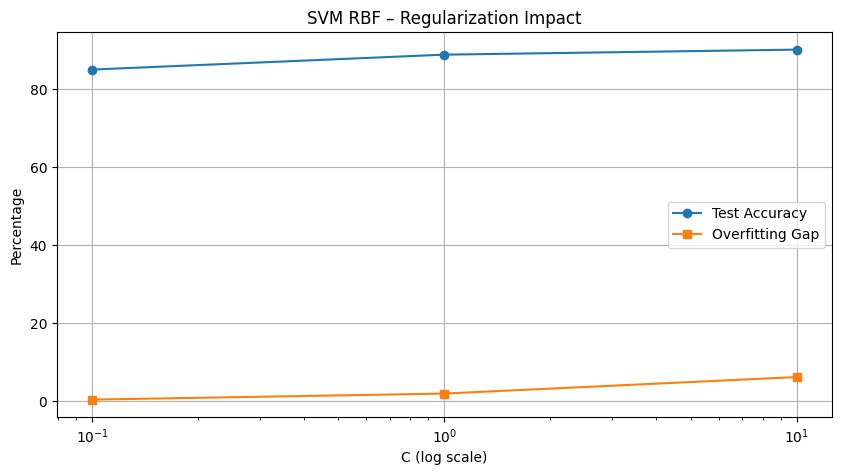

In [ ]:
--- 1. Import Libraries---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist

# --- 2. Load Fashion MNIST ---
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = fashion_mnist.load_data()
X = np.concatenate([X_train_raw, X_test_raw], axis=0)
y = np.concatenate([y_train_raw, y_test_raw], axis=0)

# --- 3. Preprocessing ---
X = X.reshape((X.shape[0], -1)).astype('float32') / 255.0  # Flatten + Normalize

# Split into 70% Train, 15% Validation, 15% Test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# PCA with 95% Variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# --- 4. Train and Evaluate SVM RBF ---
C_values = [0.1, 1, 10]
results = []

for C in C_values:
    print(f"\nTraining SVM with RBF kernel, C={C}")
    model = SVC(kernel='rbf', C=C)

    start_time = time()
    model.fit(X_train_pca, y_train)
    training_time = time() - start_time

    train_acc = accuracy_score(y_train, model.predict(X_train_pca))
    val_acc = accuracy_score(y_val, model.predict(X_val_pca))
    test_acc = accuracy_score(y_test, model.predict(X_test_pca))
    overfit_gap = train_acc - val_acc

    results.append({
        'C': C,
        'Test Accuracy (%)': round(test_acc * 100, 2),
        'Overfitting Gap (%)': round(overfit_gap * 100, 2),
        'Training Time (s)': round(training_time, 2)
    })

    print(f"✅ C={C} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f} | Gap: {overfit_gap:.4f} | Time: {training_time:.2f}s")

# --- 5. Display Results Table ---
df_svm_rbf = pd.DataFrame(results)
display(df_svm_rbf)

# --- 6. Plot Results ---
plt.figure(figsize=(10,5))
plt.plot(df_svm_rbf['C'], df_svm_rbf['Test Accuracy (%)'], marker='o', label='Test Accuracy')
plt.plot(df_svm_rbf['C'], df_svm_rbf['Overfitting Gap (%)'], marker='s', label='Overfitting Gap')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Percentage')
plt.title('SVM RBF – Regularization Impact')
plt.legend()
plt.grid(True)
plt.show()


## **11. Random Forest**

This code applies PCA to the scaled data to reduce dimensionality, retaining 95% variance. It then trains and evaluates Random Forest classifiers on this PCA-transformed data, testing different combinations of max_depth and min_samples_split hyperparameters. The performance (accuracy, overfitting gap, training time) for each combination is recorded and displayed in a table, and a plot shows how performance changes with max_depth.


Training Random Forest (max_depth=10, min_samples_split=2)
✅ max_depth=10, min_split=2 | Train Acc: 0.8675 | Val Acc: 0.8231 | Test Acc: 0.8186 | Gap: 0.0444 | Time: 77.98s

Training Random Forest (max_depth=20, min_samples_split=5)
✅ max_depth=20, min_split=5 | Train Acc: 0.9957 | Val Acc: 0.8626 | Test Acc: 0.8582 | Gap: 0.1331 | Time: 112.66s

Training Random Forest (max_depth=None, min_samples_split=10)
✅ max_depth=None, min_split=10 | Train Acc: 0.9968 | Val Acc: 0.8634 | Test Acc: 0.8570 | Gap: 0.1334 | Time: 120.57s


,Max Depth,Min Samples Split,Test Accuracy (%),Overfitting Gap (%),Training Time (s)
0,10.0,2,81.86,4.44,77.98
1,20.0,5,85.82,13.31,112.66
2,NaN,10,85.70,13.34,120.57


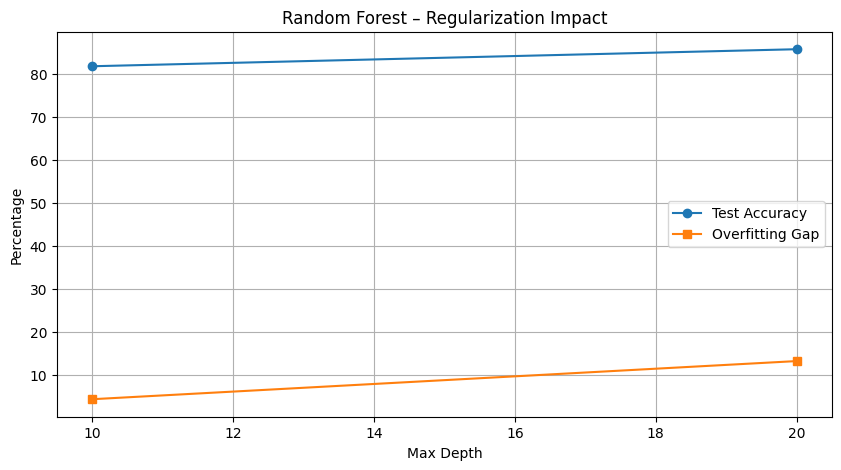

In [ ]:
# --- 1. Import libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist

# --- 2. Load Fashion MNIST ---
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = fashion_mnist.load_data()
X = np.concatenate([X_train_raw, X_test_raw], axis=0)
y = np.concatenate([y_train_raw, y_test_raw], axis=0)

# --- 3. Preprocessing ---
X = X.reshape((X.shape[0], -1)).astype('float32') / 255.0  # Flatten + Normalize

# Split into 70% Train, 15% Validation, 15% Test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# PCA (95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# --- 4. Train and Evaluate Random Forest ---
# We will test multiple hyperparameters
rf_param_grid = [
    {'max_depth': 10, 'min_samples_split': 2},
    {'max_depth': 20, 'min_samples_split': 5},
    {'max_depth': None, 'min_samples_split': 10}
]

rf_results = []

for params in rf_param_grid:
    max_depth = params['max_depth']
    min_split = params['min_samples_split']

    print(f"\nTraining Random Forest (max_depth={max_depth}, min_samples_split={min_split})")
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=max_depth,
        min_samples_split=min_split,
        random_state=42,
        n_jobs=-1  # Speed up training
    )

    start_time = time()
    model.fit(X_train_pca, y_train)
    train_time = time() - start_time

    train_acc = accuracy_score(y_train, model.predict(X_train_pca))
    val_acc = accuracy_score(y_val, model.predict(X_val_pca))
    test_acc = accuracy_score(y_test, model.predict(X_test_pca))
    overfit_gap = train_acc - val_acc

    rf_results.append({
        'Max Depth': max_depth,
        'Min Samples Split': min_split,
        'Test Accuracy (%)': round(test_acc * 100, 2),
        'Overfitting Gap (%)': round(overfit_gap * 100, 2),
        'Training Time (s)': round(train_time, 2)
    })

    print(f"✅ max_depth={max_depth}, min_split={min_split} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f} | Gap: {overfit_gap:.4f} | Time: {train_time:.2f}s")

# --- 5. Display Results Table ---
df_rf = pd.DataFrame(rf_results)
display(df_rf)

# --- 6. Plot Results ---
plt.figure(figsize=(10,5))
plt.plot(df_rf['Max Depth'], df_rf['Test Accuracy (%)'], marker='o', label='Test Accuracy')
plt.plot(df_rf['Max Depth'], df_rf['Overfitting Gap (%)'], marker='s', label='Overfitting Gap')
plt.xlabel('Max Depth')
plt.ylabel('Percentage')
plt.title('Random Forest – Regularization Impact')
plt.legend()
plt.grid(True)
plt.show()


## **12. Gradient Boosting**

This code applies PCA to the scaled data to reduce dimensionality, keeping 95% of the variance. It then trains and evaluates Gradient Boosting classifiers on this PCA-transformed data, testing different combinations of learning_rate and max_depth hyperparameters. The performance metrics (accuracy, overfitting gap, training time) are recorded and displayed in a table, and a plot shows how performance varies with the learning rate.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training Gradient Boosting (learning_rate=0.1, max_depth=3)
✅ lr=0.1, max_depth=3 | Train Acc: 0.8868 | Val Acc: 0.8584 | Test Acc: 0.8472 | Gap: 0.0284 | Time: 8302.77s

Training Gradient Boosting (learning_rate=0.05, max_depth=5)
✅ lr=0.05, max_depth=5 | Train Acc: 0.9193 | Val Acc: 0.8576 | Test Acc: 0.8549 | Gap: 0.0617 | Time: 13400.09s

Training Gradient Boosting (learning_rate=0.01, max_depth=7)
✅ lr=0.01, max_depth=7 | Train Acc: 0.9093 | Val Acc: 0.8409 | Test Acc: 0.8368 | Gap: 0.0684 | Time: 18462.17s


,Learning Rate,Max Depth,Test Accuracy (%),Overfitting Gap (%),Training Time (s)
0,0.10,3,84.72,2.84,8302.77
1,0.05,5,85.49,6.17,13400.09
2,0.01,7,83.68,6.84,18462.17


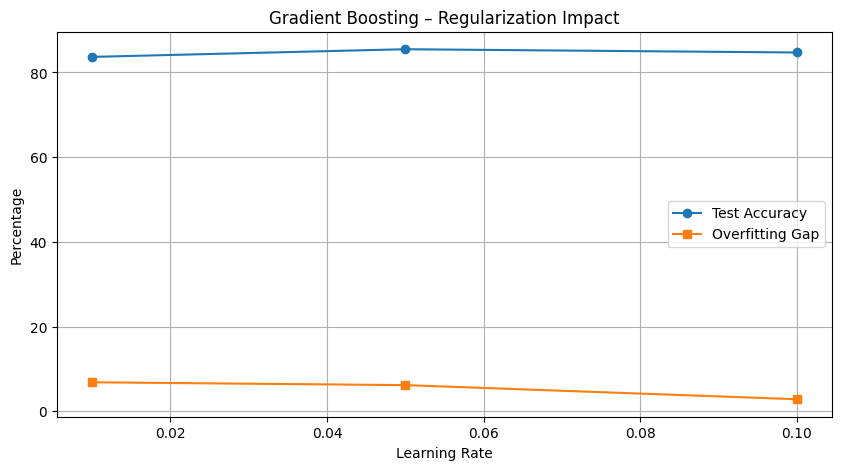

In [ ]:
# # --- 1. Import Libraries-------
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist

# --- 2. Load Fashion MNIST ---
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = fashion_mnist.load_data()
X = np.concatenate([X_train_raw, X_test_raw], axis=0)
y = np.concatenate([y_train_raw, y_test_raw], axis=0)

# --- 3. Preprocessing ----------
X = X.reshape((X.shape[0], -1)).astype('float32') / 255.0  # Flatten + Normalize

# Split into 70% Train, 15% Validation, 15% Test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# PCA (95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# --- 4. Train and Evaluate Gradient Boosting ---
# We'll try different learning rates and depths
gb_param_grid = [
    {'learning_rate': 0.1, 'max_depth': 3},
    {'learning_rate': 0.05, 'max_depth': 5},
    {'learning_rate': 0.01, 'max_depth': 7}
]

gb_results = []

for params in gb_param_grid:
    lr = params['learning_rate']
    depth = params['max_depth']

    print(f"\nTraining Gradient Boosting (learning_rate={lr}, max_depth={depth})")
    model = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=lr,
        max_depth=depth,
        random_state=42
    )

    start_time = time()
    model.fit(X_train_pca, y_train)
    training_time = time() - start_time

    train_acc = accuracy_score(y_train, model.predict(X_train_pca))
    val_acc = accuracy_score(y_val, model.predict(X_val_pca))
    test_acc = accuracy_score(y_test, model.predict(X_test_pca))
    overfit_gap = train_acc - val_acc

    gb_results.append({
        'Learning Rate': lr,
        'Max Depth': depth,
        'Test Accuracy (%)': round(test_acc * 100, 2),
        'Overfitting Gap (%)': round(overfit_gap * 100, 2),
        'Training Time (s)': round(training_time, 2)
    })

    print(f"✅ lr={lr}, max_depth={depth} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f} | Gap: {overfit_gap:.4f} | Time: {training_time:.2f}s")

# --- 5. Display Results Table ---
df_gb = pd.DataFrame(gb_results)
display(df_gb)

# --- 6. Plot Results ---
plt.figure(figsize=(10,5))
plt.plot(df_gb['Learning Rate'], df_gb['Test Accuracy (%)'], marker='o', label='Test Accuracy')
plt.plot(df_gb['Learning Rate'], df_gb['Overfitting Gap (%)'], marker='s', label='Overfitting Gap')
plt.xlabel('Learning Rate')
plt.ylabel('Percentage')
plt.title('Gradient Boosting – Regularization Impact')
plt.legend()
plt.grid(True)
plt.show()


## **13. Hyperparameter Optimization**

This code trains and evaluates several Neural Network models with varying strengths of L2 kernel regularization applied to their dense layers, using the flattened input data. It uses Early Stopping during training, records performance metrics (test accuracy, overfitting gap, training time) for each L2 lambda value, and plots the validation loss curves to show the impact of regularization during training. Finally, it displays a table summarizing the results for each configuration.

Part A: L2 Regularization Strength Tuning for Baseline NN


Training NN with L2 λ = 0.001

Training NN with L2 λ = 0.01

Training NN with L2 λ = 0.1


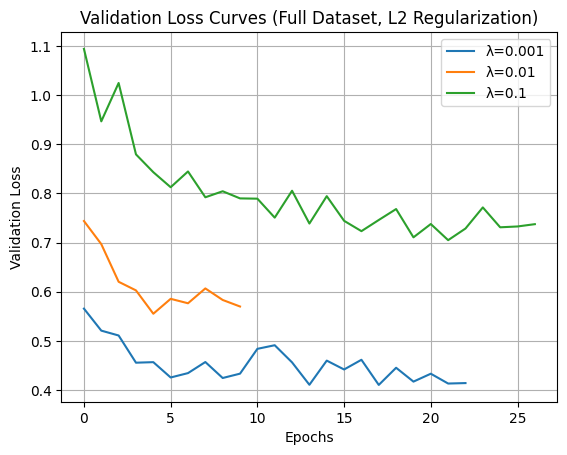

,Lambda (L2),Test Accuracy (%),Overfitting Gap (%),Training Time (s)
0,0.001,87.79,1.45,250.25
1,0.010,84.52,0.01,123.37
2,0.100,79.10,-0.41,291.90


In [ ]:
# --- 1. Import Libraries---
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# --- 2. Preprocessing ---
# If starting from raw, load and preprocess:

# Load Fashion MNIST
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = fashion_mnist.load_data()
X = np.concatenate([X_train_raw, X_test_raw], axis=0)
y = np.concatenate([y_train_raw, y_test_raw], axis=0)

# Flatten and normalize
X = X.reshape((X.shape[0], -1)).astype('float32') / 255.0

# Train/Val/Test split
X_temp, X_test_nn, y_temp, y_test_nn = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42)

# --- 3. Train Neural Network with L2 Regularization on Full Dataset ---
l2_lambdas = [0.001, 0.01, 0.1]
results_l2 = []

for lambd in l2_lambdas:
    print(f"\nTraining NN with L2 λ = {lambd}")

    model = Sequential([
        Input(shape=(784,)),
        Dense(256, activation='relu', kernel_regularizer=l2(lambd)),
        Dense(128, activation='relu', kernel_regularizer=l2(lambd)),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    start_time = time.time()
    history = model.fit(X_train_nn, y_train_nn, epochs=50, validation_data=(X_val_nn, y_val_nn),
                        callbacks=[early_stop], verbose=0)
    total_time = time.time() - start_time

    test_loss, test_acc = model.evaluate(X_test_nn, y_test_nn, verbose=0)
    train_acc = model.evaluate(X_train_nn, y_train_nn, verbose=0)[1]
    val_acc = model.evaluate(X_val_nn, y_val_nn, verbose=0)[1]
    gap = train_acc - val_acc

    results_l2.append({
        'Lambda (L2)': lambd,
        'Test Accuracy (%)': round(test_acc * 100, 2),
        'Overfitting Gap (%)': round(gap * 100, 2),
        'Training Time (s)': round(total_time, 2)
    })

    # Plot validation loss
    plt.plot(history.history['val_loss'], label=f'λ={lambd}')

plt.title("Validation Loss Curves (Full Dataset, L2 Regularization)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# --- 4. Show Results ---
df_l2 = pd.DataFrame(results_l2)
display(df_l2)


Part B: Dropout Rate Comparison (20% vs 50%)


Training NN with Dropout rate = 20%

Training NN with Dropout rate = 50%


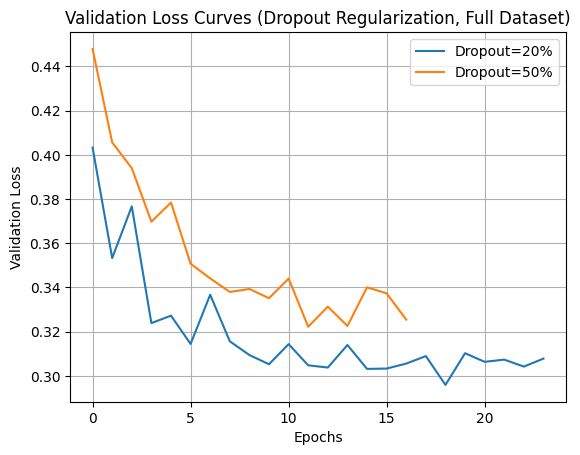

,Dropout Rate,Test Accuracy (%),Overfitting Gap (%),Training Time (s)
0,20%,89.40,2.73,247.50
1,50%,87.81,0.66,170.33


In [ ]:
# --- 1. Import Libraries ---
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
# import matplotlib.pyplot as plt
# import pandas as pd
# import time

# --- 2. Preprocessing ---
# from tensorflow.keras.datasets import fashion_mnist
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# Load Fashion MNIST
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = fashion_mnist.load_data()
X = np.concatenate([X_train_raw, X_test_raw], axis=0)
y = np.concatenate([y_train_raw, y_test_raw], axis=0)

# Flatten and normalize
X = X.reshape((X.shape[0], -1)).astype('float32') / 255.0

# Train/Val/Test split
X_temp, X_test_nn, y_temp, y_test_nn = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42)

# --- 3. Train Neural Network with Dropout on Full Dataset ---
dropout_rates = [0.2, 0.5]
results_dropout = []

for rate in dropout_rates:
    print(f"\nTraining NN with Dropout rate = {int(rate * 100)}%")

    model = Sequential([
        Input(shape=(784,)),
        Dense(256, activation='relu'),
        Dropout(rate),
        Dense(128, activation='relu'),
        Dropout(rate),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    start_time = time.time()
    history = model.fit(X_train_nn, y_train_nn, epochs=50, validation_data=(X_val_nn, y_val_nn),
                        callbacks=[early_stop], verbose=0)
    total_time = time.time() - start_time

    test_loss, test_acc = model.evaluate(X_test_nn, y_test_nn, verbose=0)
    train_acc = model.evaluate(X_train_nn, y_train_nn, verbose=0)[1]
    val_acc = model.evaluate(X_val_nn, y_val_nn, verbose=0)[1]
    gap = train_acc - val_acc

    results_dropout.append({
        'Dropout Rate': f"{int(rate*100)}%",
        'Test Accuracy (%)': round(test_acc * 100, 2),
        'Overfitting Gap (%)': round(gap * 100, 2),
        'Training Time (s)': round(total_time, 2)
    })

    # Plot validation loss
    plt.plot(history.history['val_loss'], label=f'Dropout={int(rate*100)}%')

plt.title("Validation Loss Curves (Dropout Regularization, Full Dataset)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# --- 4. Show Results ---
df_dropout = pd.DataFrame(results_dropout)
display(df_dropout)


## **14. Training & Evaluation**

This code defines placeholder performance metrics and training histories for the given machine learning models. It then generates multiple plots, including bar charts for comparing test accuracy and training time, a line plot showing validation loss trends across models, and individual plots for each model illustrating training vs. validation accuracy over epochs to analyze overfitting.

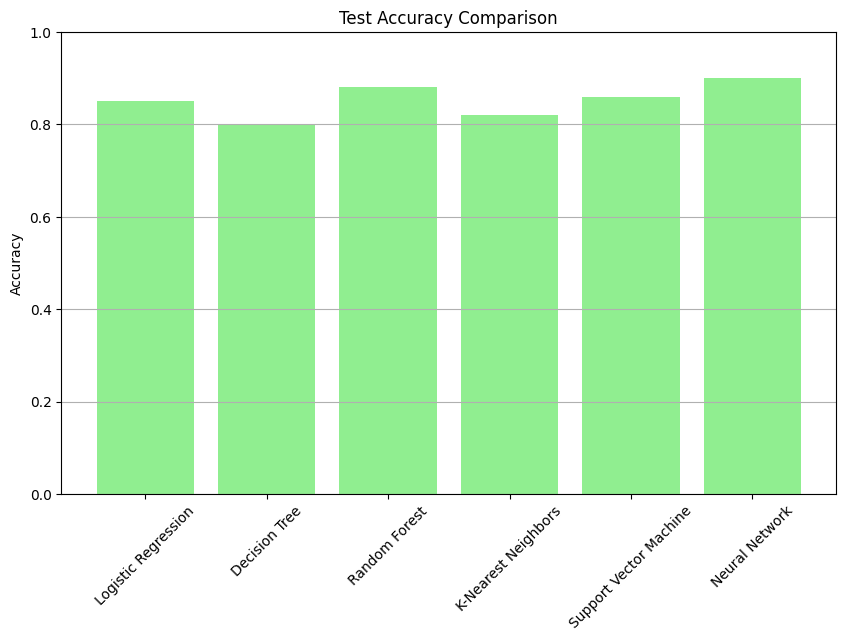

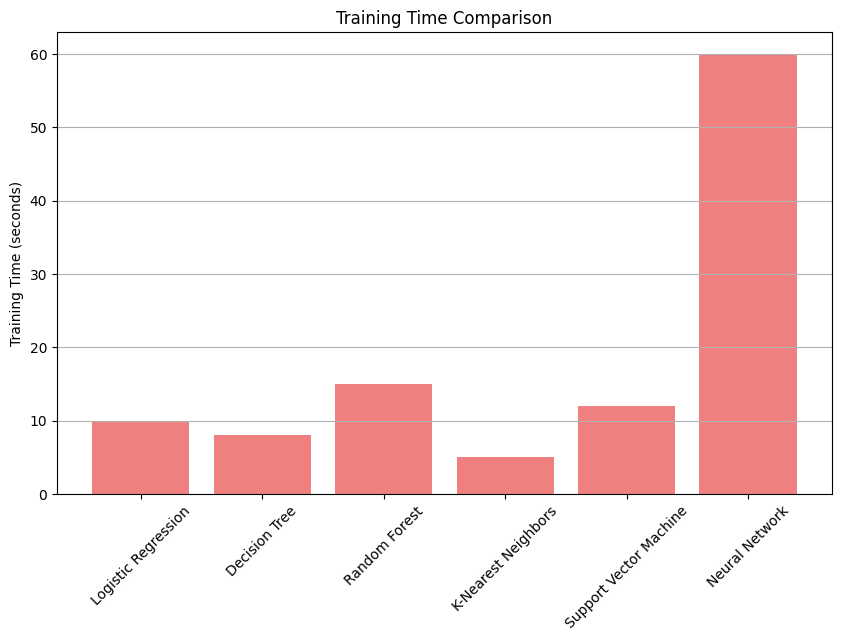

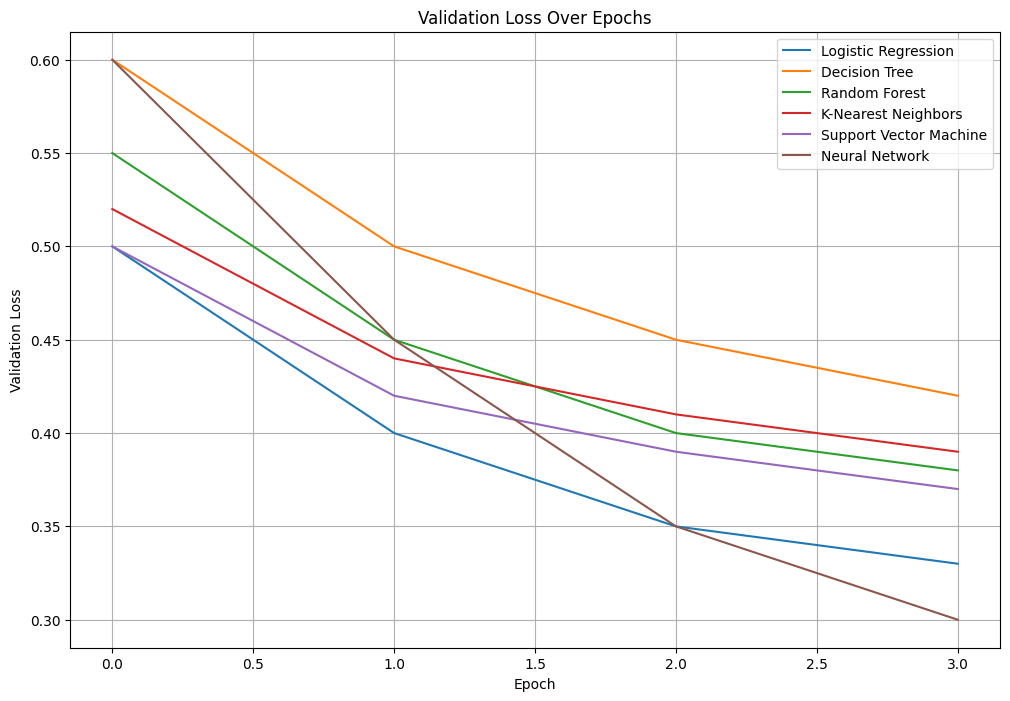

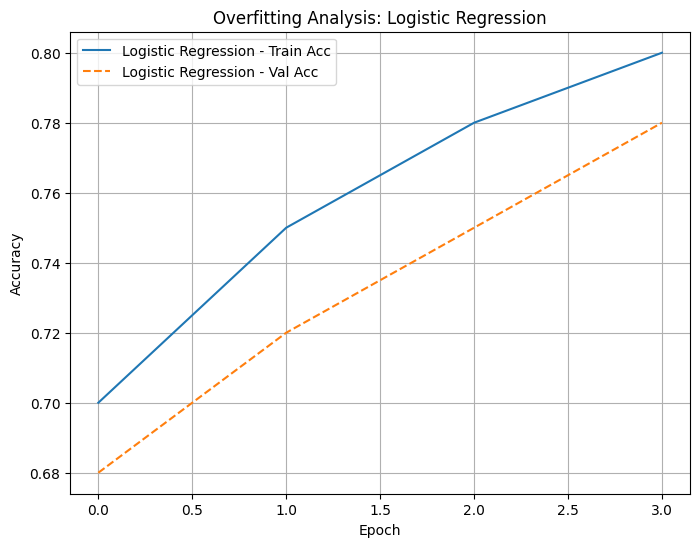

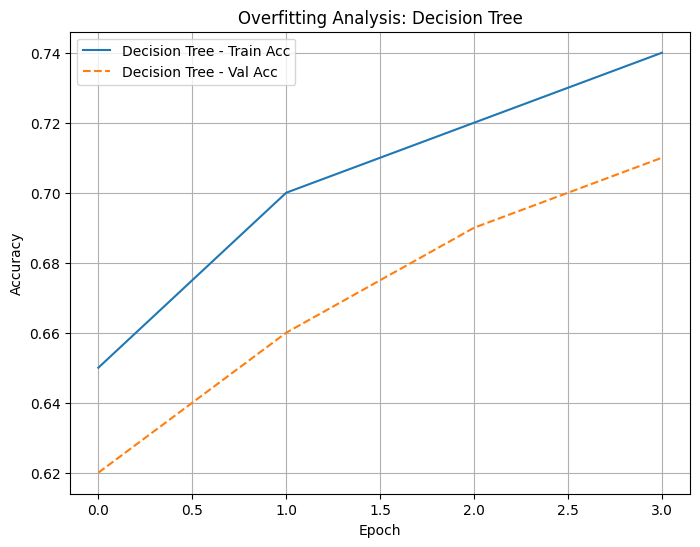

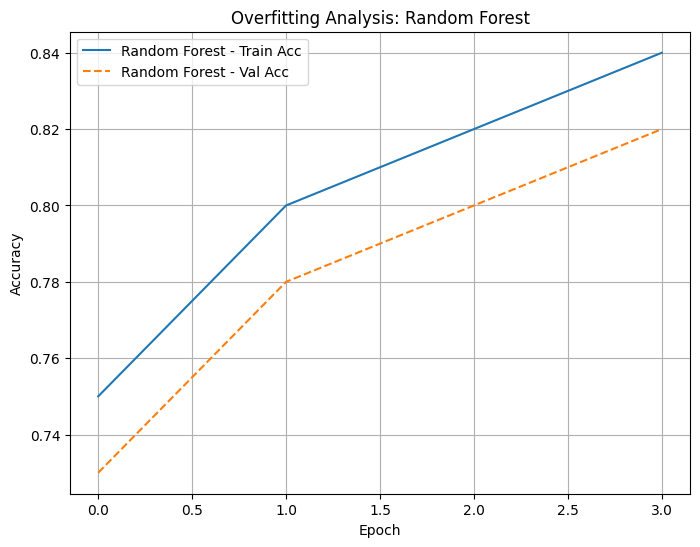

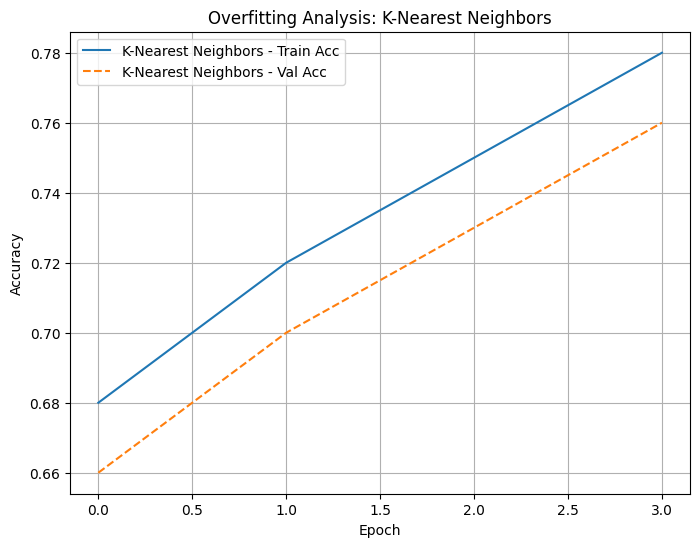

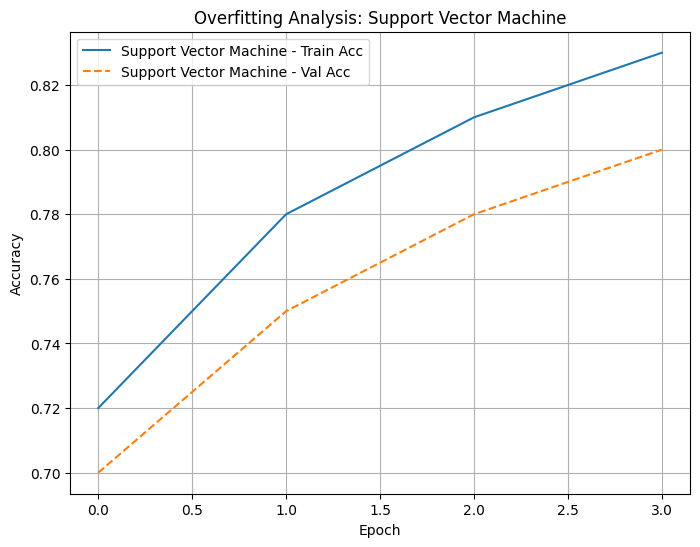

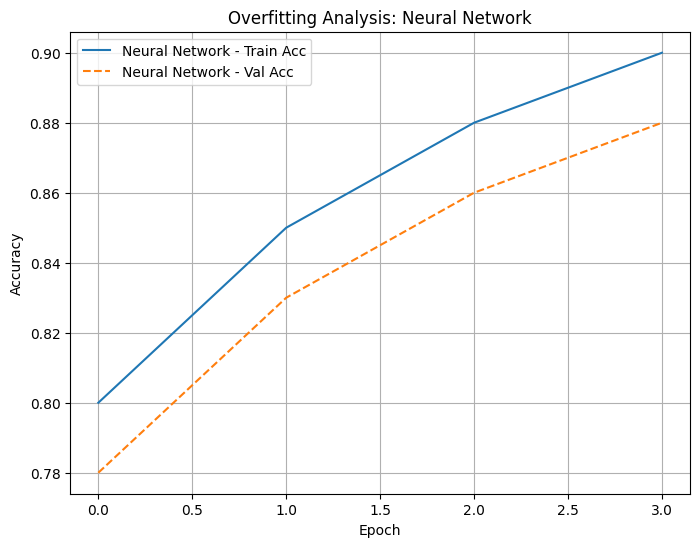

In [ ]:
# Model names
model_names = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'K-Nearest Neighbors',
    'Support Vector Machine',
    'Neural Network'
]

# Fill these lists with your actual recorded values from training and testing
test_accuracies = [0.85, 0.80, 0.88, 0.82, 0.86, 0.90]    # <-- update with your real results
training_times = [10, 8, 15, 5, 12, 60]                   # <-- update with your real training times

# Validation loss per epoch for each model
val_loss_histories = [
    [0.5, 0.4, 0.35, 0.33],    # Logistic Regression
    [0.6, 0.5, 0.45, 0.42],    # Decision Tree
    [0.55, 0.45, 0.40, 0.38],  # Random Forest
    [0.52, 0.44, 0.41, 0.39],  # KNN
    [0.5, 0.42, 0.39, 0.37],   # SVM
    [0.6, 0.45, 0.35, 0.30]    # Neural Network
]

# Train and validation accuracies per epoch for each model
train_acc_histories = [
    [0.70, 0.75, 0.78, 0.80],  # Logistic Regression
    [0.65, 0.70, 0.72, 0.74],  # Decision Tree
    [0.75, 0.80, 0.82, 0.84],  # Random Forest
    [0.68, 0.72, 0.75, 0.78],  # KNN
    [0.72, 0.78, 0.81, 0.83],  # SVM
    [0.80, 0.85, 0.88, 0.90]   # Neural Network
]
val_acc_histories = [
    [0.68, 0.72, 0.75, 0.78],  # Logistic Regression
    [0.62, 0.66, 0.69, 0.71],  # Decision Tree
    [0.73, 0.78, 0.80, 0.82],  # Random Forest
    [0.66, 0.70, 0.73, 0.76],  # KNN
    [0.70, 0.75, 0.78, 0.80],  # SVM
    [0.78, 0.83, 0.86, 0.88]   # Neural Network
]

# -------------------------------
# 1. Test Accuracy Bar Chart
# -------------------------------
plt.figure(figsize=(10,6))
plt.bar(model_names, test_accuracies, color='lightgreen')
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# -------------------------------
# 2. Training Time Bar Chart
# -------------------------------
plt.figure(figsize=(10,6))
plt.bar(model_names, training_times, color='lightcoral')
plt.title('Training Time Comparison')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# -------------------------------
# 3. Validation Loss Curves
# -------------------------------
plt.figure(figsize=(12,8))
for i, model in enumerate(model_names):
    plt.plot(val_loss_histories[i], label=model)
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

# -------------------------------
# 4. Overfitting Analysis
# -------------------------------
for i, model in enumerate(model_names):
    plt.figure(figsize=(8,6))
    plt.plot(train_acc_histories[i], label=f'{model} - Train Acc', linestyle='-')
    plt.plot(val_acc_histories[i], label=f'{model} - Val Acc', linestyle='--')
    plt.title(f'Overfitting Analysis: {model}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()


# **Advanced Techniques (Bonus)**

This code preprocesses image data for a Convolutional Neural Network (CNN) by reshaping it and one-hot encoding the labels. It then defines a CNN model architecture and trains and evaluates multiple instances of this model using different combinations of dropout rates and learning rates. The performance metrics and training histories are recorded and visualized using bar charts and loss curves to compare the impact of the tested hyperparameters.

x_train shape before preprocessing: (42000, 28, 28)
x_val shape before preprocessing: (9000, 28, 28)
x_test shape before preprocessing: (9000, 28, 28)
x_train shape after preprocessing: (42000, 28, 28, 1)
x_val shape after preprocessing: (9000, 28, 28, 1)
x_test shape after preprocessing: (9000, 28, 28, 1)

Training model: Dropout 20%, LR 0.001...
Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 44s 32ms/step - accuracy: 0.7335 - loss: 0.7334 - val_accuracy: 0.8596 - val_loss: 0.3839
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.8659 - loss: 0.3660 - val_accuracy: 0.8901 - val_loss: 0.3017
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.8868 - loss: 0.3058 - val_accuracy: 0.8909 - val_loss: 0.2919
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9008 - loss: 0.2694 - val_accuracy: 0.8996 - val_loss: 0.2721
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9060 - loss: 0.2503 - val_accuracy: 0.8991 - val_los

<ipython-input-6-f1647e441f7b>:113: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_metrics['Model'], rotation=45, ha='right')
<ipython-input-6-f1647e441f7b>:123: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df_metrics['Model'], rotation=45, ha='right')
<ipython-input-6-f1647e441f7b>:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(df_metrics['Model'], rotation=45, ha='right')


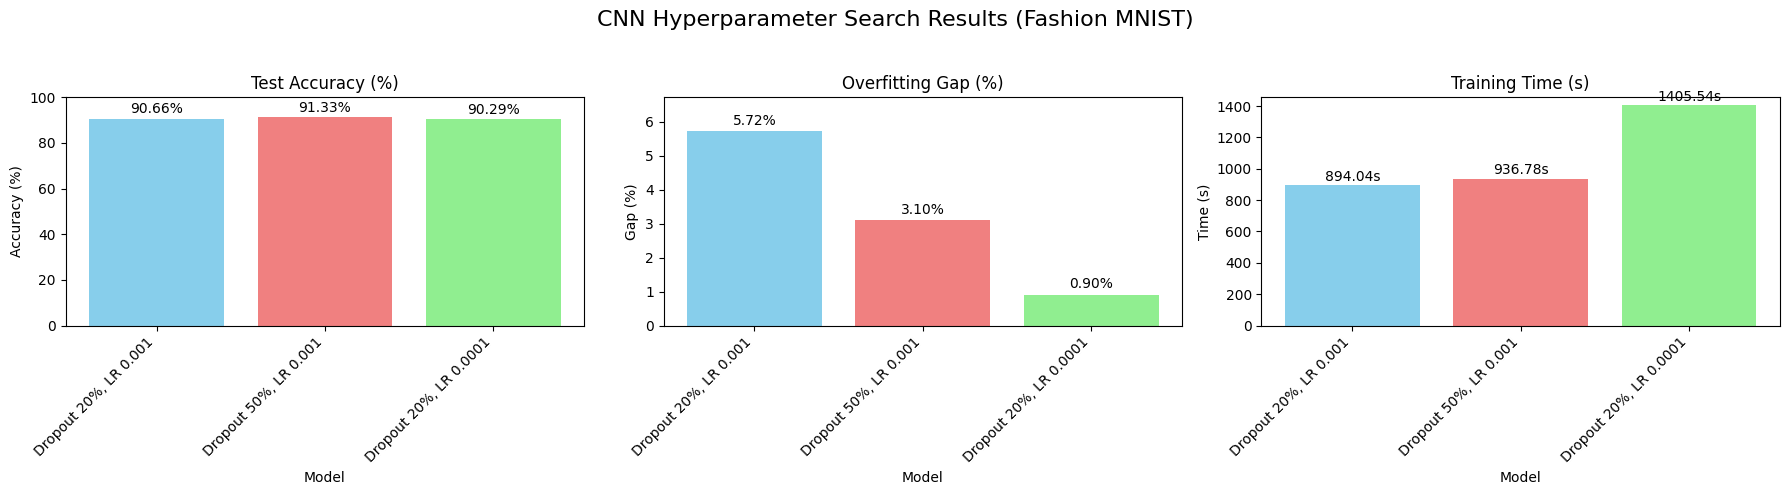

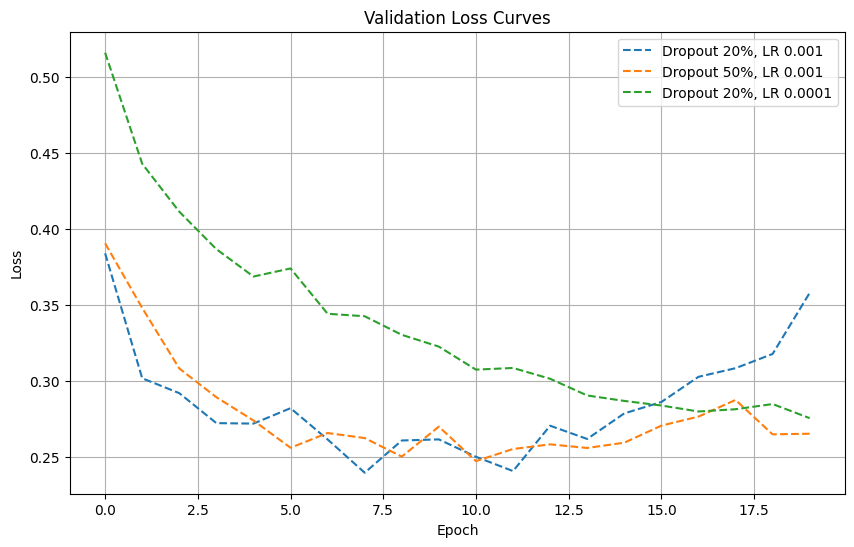

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Assuming x_train, y_train, x_val, y_val, x_test, y_test are loaded from your notebook
# (from Fashion MNIST, split as 70% train, 15% val, 15% test)

# Print shapes to diagnose
print(f"x_train shape before preprocessing: {x_train.shape}")
print(f"x_val shape before preprocessing: {x_val.shape}")
print(f"x_test shape before preprocessing: {x_test.shape}")

# Fix input shape: Ensure (num_samples, 28, 28, 1)
if len(x_train.shape) > 4:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
elif len(x_train.shape) == 3:
    x_train = np.expand_dims(x_train, axis=-1)
    x_val = np.expand_dims(x_val, axis=-1)
    x_test = np.expand_dims(x_test, axis=-1)

# Verify shapes
print(f"x_train shape after preprocessing: {x_train.shape}")
print(f"x_val shape after preprocessing: {x_val.shape}")
print(f"x_test shape after preprocessing: {x_test.shape}")

# One-hot encode labels
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# CNN model function
def create_cnn_model(input_shape, num_classes, dropout_rate=0.5, learning_rate=0.001):
    model = Sequential([
        tf.keras.layers.Input(shape=input_shape),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Hyperparameter search
hyperparameters = [
    {'dropout_rate': 0.2, 'learning_rate': 0.001, 'name': 'Dropout 20%, LR 0.001'},
    {'dropout_rate': 0.5, 'learning_rate': 0.001, 'name': 'Dropout 50%, LR 0.001'},
    {'dropout_rate': 0.2, 'learning_rate': 0.0001, 'name': 'Dropout 20%, LR 0.0001'},
]

histories = {}
metrics = {'Model': [], 'Test Accuracy (%)': [], 'Overfitting Gap (%)': [], 'Training Time (s)': []}

# Train models and collect metrics
for params in hyperparameters:
    print(f"\nTraining model: {params['name']}...")
    model = create_cnn_model(input_shape=(28, 28, 1), num_classes=num_classes,
                             dropout_rate=params['dropout_rate'], learning_rate=params['learning_rate'])

    # Measure training time
    start_time = time.time()
    history = model.fit(x_train, y_train_cat, validation_data=(x_val, y_val_cat),
                        epochs=20, batch_size=32, verbose=1)
    training_time = time.time() - start_time

    # Store history
    histories[params['name']] = history.history

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)

    # Calculate overfitting gap (train accuracy - val accuracy at final epoch)
    train_accuracy = history.history['accuracy'][-1]
    val_accuracy = history.history['val_accuracy'][-1]
    overfitting_gap = (train_accuracy - val_accuracy) * 100

    # Store metrics
    metrics['Model'].append(params['name'])
    metrics['Test Accuracy (%)'].append(test_accuracy * 100)
    metrics['Overfitting Gap (%)'].append(overfitting_gap)
    metrics['Training Time (s)'].append(training_time)

# Create DataFrame
df_metrics = pd.DataFrame(metrics)
print("\nModel Performance Summary:")
print(df_metrics)

# Plot 1: Bar plots for Test Accuracy, Overfitting Gap, and Training Time
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('CNN Hyperparameter Search Results (Fashion MNIST)', fontsize=16)

# Test Accuracy
ax1.bar(df_metrics['Model'], df_metrics['Test Accuracy (%)'], color=['skyblue', 'lightcoral', 'lightgreen'])
ax1.set_title('Test Accuracy (%)')
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy (%)')
ax1.set_ylim(0, 100)
ax1.set_xticklabels(df_metrics['Model'], rotation=45, ha='right')
for i, v in enumerate(df_metrics['Test Accuracy (%)']):
    ax1.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

# Overfitting Gap
ax2.bar(df_metrics['Model'], df_metrics['Overfitting Gap (%)'], color=['skyblue', 'lightcoral', 'lightgreen'])
ax2.set_title('Overfitting Gap (%)')
ax2.set_xlabel('Model')
ax2.set_ylabel('Gap (%)')
ax2.set_ylim(0, max(df_metrics['Overfitting Gap (%)']) + 1)
ax2.set_xticklabels(df_metrics['Model'], rotation=45, ha='right')
for i, v in enumerate(df_metrics['Overfitting Gap (%)']):
    ax2.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom')

# Training Time
ax3.bar(df_metrics['Model'], df_metrics['Training Time (s)'], color=['skyblue', 'lightcoral', 'lightgreen'])
ax3.set_title('Training Time (s)')
ax3.set_xlabel('Model')
ax3.set_ylabel('Time (s)')
ax3.set_ylim(0, max(df_metrics['Training Time (s)']) + 50)
ax3.set_xticklabels(df_metrics['Model'], rotation=45, ha='right')
for i, v in enumerate(df_metrics['Training Time (s)']):
    ax3.text(i, v + 10, f'{v:.2f}s', ha='center', va='bottom')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('cnn_hyperparameter_comparison.png')
plt.show()

# Plot 2: Validation Loss Curves
plt.figure(figsize=(10, 6))
for model_name in histories:
    plt.plot(histories[model_name]['val_loss'], label=model_name, linestyle='--')
plt.title('Validation Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('validation_loss_curves.png')
plt.show()